## 02 Convenience

This notebook explains each function in the convenience module. These functions are not required but help the user, or supply support tools.

In [19]:
# import modules
import convenience as con
import numpy as np

from astropy.constants import au

# point to test data
test_stereo_fits="./test_data/stereo/20121109_030915_B.fts"

# some synthetic and real FITS data
real_stereo_fits_tb="./test_data/stereo/20121109_030915_B.fts"
real_stereo_fits_pb="./test_data/stereo/20121109_030915_pB.fts"

synth_stereo_fits_tb="./test_data/synthetic/028_STEREO_COR2_cme_TB_90.fits"
synth_stereo_fits_tb_rot="./test_data/synthetic/028_STEREO_COR2_cme_TB_0.fits"
synth_stereo_fits_pb="./test_data/synthetic/028_STEREO_COR2_cme_PB_90.fits"
synth_stereo_fits_pb_rot="./test_data/synthetic/028_STEREO_COR2_cme_PB_0.fits"

### Function: show_1_image, show_2_images, show_3_images
The convenience functions are used for displaying images using matplotlib pyplot. They accept images first, followed by optional titles: img1, img2, img3, title1="sring 1", title2="sring 2", title3="sring 3". The functions are used throughout this notebook

### Function: generate_square_test_pattern 
Generates a test image with a square pattern, useful for testing blurring and image output, see show_1_image in the plotter module for an explanation. Different levels of noise can be added.

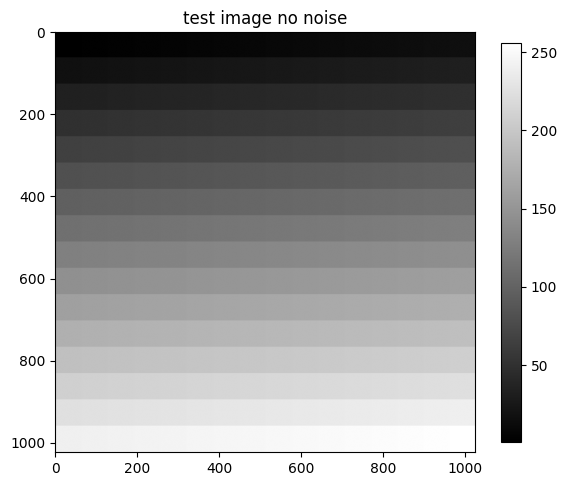

In [2]:
# Generate test image
test_image=con.generate_square_test_pattern(size=1024, square_size=64, noise_level=0)

# show output doc_06_plotter
con.show_1_image(test_image, title1="test image no noise")

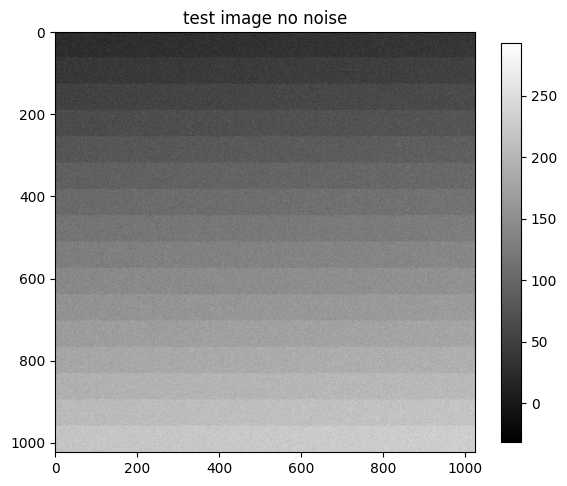

In [3]:
# test image with some noise
test_image=con.generate_square_test_pattern(size=1024, square_size=64, noise_level=20)

# show output doc_06_plotter
con.show_1_image(test_image, title1="test image no noise")

### Function: open_fits
A convenience wrapper around astropy fits reader for quick  

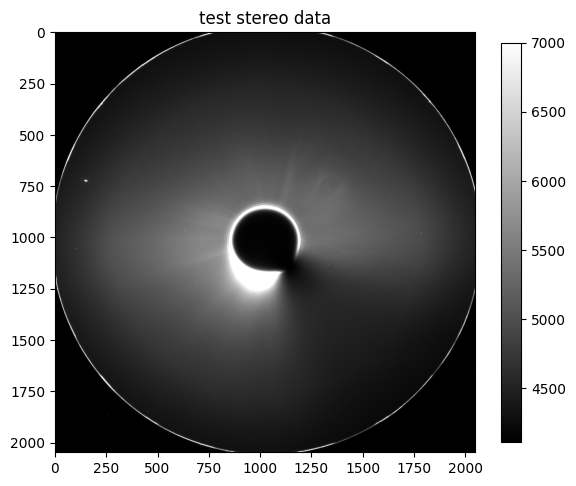

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2048                                                  NAXIS2  =                 2048                                                  DATE-OBS= '2012-11-09T03:09:15.006' /                                           FILEORIG= 'CB0900OF.411'       /                                                SEB_PROG= 'NORMAL  '           /                                                SYNC    =                    T /                                                SPWX    =                    T /                                                EXPCMD  =              2.00090 /                                                EXPTIME =        6.00458000000 / sum of from MEB                                DSTART1 =                    1 /        

In [4]:
# import stereo data
test_fits_data, test_fits_hdr = con.open_fits(test_stereo_fits)

# display the data
minval = np.min(test_fits_data)
maxval = 7000
clip_data = np.clip(test_fits_data, minval, maxval)
con.show_1_image(clip_data, title1="test stereo data")

# see the header
print(test_fits_hdr)

### Function: minmax
Displays the minimum and maximum values of an input array ignoring NaNs.

In [5]:
# display the min and max of the stereo data
con.minmax(test_fits_data)

# display the min and max of the clipped stereo data
con.minmax(clip_data, label="clipped data")

array: min = 4112, max = 25097.3
clipped data: min = 4112, max = 7000


### Function: to_solar_radii
A simple wrapper to convert a distance in km into solar radii

In [6]:
# Define distance in km
dist_in_km=695700.
dist_in_solar_radii=con.to_solar_radii(dist_in_km)
print(dist_in_km," km = ", dist_in_solar_radii, "solar radii" )

dist_in_km=12300700.
dist_in_solar_radii=con.to_solar_radii(dist_in_km)
print(dist_in_km," km = ", dist_in_solar_radii, "solar radii" )

695700.0  km =  1.0 solar radii
12300700.0  km =  17.681040678453357 solar radii


### Function: to_km
A simple wrapper to convert a distance to km from solar radii or AU

In [7]:
# find 1 AU in km
dist_in_km=con.to_km(1, unit="AU")
print("1 AU = ", dist_in_km, "km" )

# find 215 Rsun in km
dist_in_km=con.to_km(1, unit="L1")
print("L1 = ", dist_in_km, "km" )

1 AU =  149597870.70000002 km
L1 =  148097870.70000002 km


### Function: blur_image
Used for smoothing data to reduce noise, guass_kern generates a normalized 2D Gaussian kernel for convolution and is used by blur_image, computed using `scipy.signal.convolve` module.

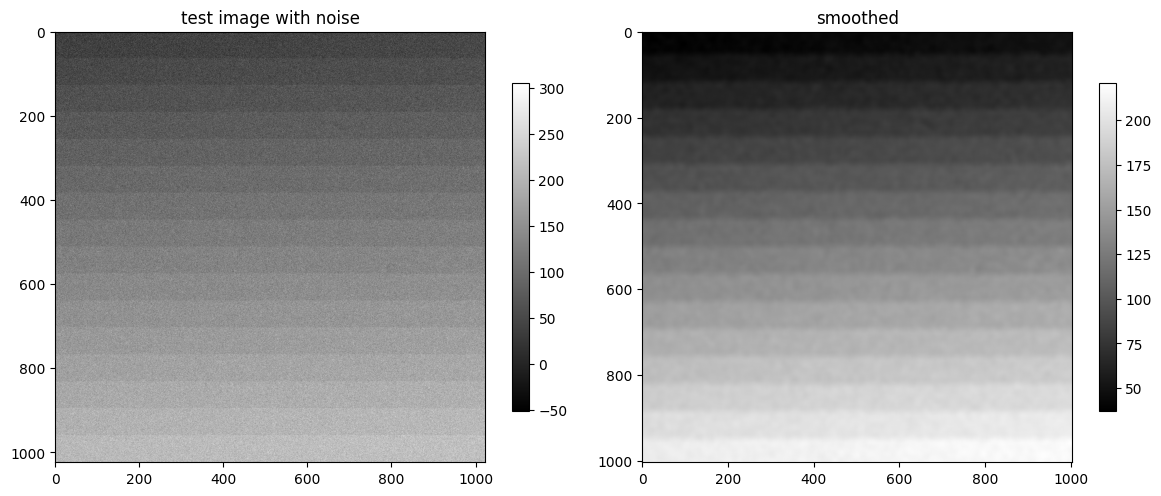

In [8]:
# Generate a test image with a square pattern, see doc_02_convenince
test_image=con.generate_square_test_pattern(size=1024, square_size=64, noise_level=30)

# smooth the data, n defines the Gaussian kernel half-size
smooth_test_image = con.blur_image(test_image, n=10)

# show before and after smoothing see doc_06_plotter
con.show_2_images(test_image, smooth_test_image, title1="test image with noise", title2="smoothed")

### Function: clean_distance
Used for cleaning up NaNs, negative distances and errors generated by the distance calculation functions

The function performs the following clean-ups:
    1. Converts the input to a float numpy array.
    2. Removes non-finite values (NaN, +inf, -inf).
    3. Removes negative distances.
    4. Removes distances that exceed `max_factor * dist_obs_to_source_km` (e.g., default = 2× observer–Sun distance).

In [ ]:
# create an array of data to be cleaned
dist_obs = au.to('km').value
dirty_data = np.array([1e5, -5, np.inf, 3*dist_obs, 1e8, con.to_km(1.1, unit="AU")])
print("dirty data", dirty_data)

# clean the data 1
clean_data = con.clean_distance(dirty_data, dist_obs)
print("clean data", clean_data)

# clean the data 2 with a more stringent distance
clean_data = con.clean_distance(dirty_data, dist_obs, max_factor=1.0)
print("clean data", clean_data)

dirty data [ 1.00000000e+05 -5.00000000e+00             inf  4.48793612e+08
  1.00000000e+08  1.64557658e+08]
clean data [1.00000000e+05            nan            nan            nan
 1.00000000e+08 1.64557658e+08]
clean data [1.e+05    nan    nan    nan 1.e+08    nan]


### Function: copy_metadata
Used for adding metadata from a real source on to some synthetic data

In [20]:
con.copy_metadata( real_stereo_fits_pb,  synth_stereo_fits_pb, "./test_data/synthetic2/synth_pB.fits")
con.copy_metadata( real_stereo_fits_tb,  synth_stereo_fits_tb, "./test_data/synthetic2/synth_tB.fits")
con.copy_metadata( real_stereo_fits_tb,  synth_stereo_fits_tb_rot, "./test_data/synthetic2/tessynth_tB_rotated.fits")
con.copy_metadata( real_stereo_fits_pb,  synth_stereo_fits_pb_rot, "./test_data/synthetic2/tessynth_pB_rotated.fits")

synth_stereo_fits_pb_rot

Wrote: test_data\synthetic2\synth_pB.fits
Wrote: test_data\synthetic2\synth_tB.fits
Wrote: test_data\synthetic2\tessynth_tB_rotated.fits
Wrote: test_data\synthetic2\tessynth_pB_rotated.fits


'./test_data/synthetic/028_STEREO_COR2_cme_PB_0.fits'